In [6]:

import numpy as np
import tensorflow as tf
from models.test_functions import TestFunLinearCorrelation
import matplotlib.pyplot as plt
from utils.utils import build_models, train_models, get_final_models_dict, get_gridpoints, get_nlpd, get_abs_error
from utils.plotting_utils import plot_lmls, plot_predictions, plot_lvmogp_latent_variables
import os

# Notebook for Fitting and Plotting All Gaussian Process Models

In [8]:
model_names = ['mo_indi', 'lvmogp', 'lmc', 'avg']
train_inducing = True
domain = [0, 2]
latent_dims = 2
latent_dims_lvmogp = 2
observed_dims = 1
n_fun = 6
n_points = [2, 8, 4, 2, 10, 3]
max_points = 60
noise = 0.1
n_grid_points = 100
continuous_dims = ['x1', 'x2'][:observed_dims]
lengthscales_x = [0.2, 0.2]
same_points=False

if type(n_points) is int:
    n_points = [n_points]*n_fun

# Create the Test functions

seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)



test_fun = TestFunLinearCorrelation(domain, seed, n_fun, observed_dims, latent_dims, max_points, noise, n_grid_points,
                                    same_points, lengthscales_x)

data_X, fun_nos, data_y = test_fun.create_data(n_points=n_points)

In [10]:
models_dict = build_models(model_names, data_X, data_y, fun_nos, n_fun, observed_dims, latent_dims, latent_dims_lvmogp,
                           domain, n_restarts=2)

successful build model mo_indi, restart 0, init_type random restart 1
successful build model mo_indi, restart 0, init_type random restart 2
successful build model mo_indi, restart 0, init_type random restart 3
successful build model mo_indi, restart 1, init_type random restart 1
successful build model mo_indi, restart 1, init_type random restart 2
successful build model mo_indi, restart 1, init_type random restart 3
successful build model lvmogp, restart 0, init_type random
successful build model lvmogp, restart 0, init_type mo_pca
successful build model lvmogp, restart 0, init_type gpy
successful build model lvmogp, restart 1, init_type random
successful build model lvmogp, restart 1, init_type mo_pca
successful build model lvmogp, restart 1, init_type gpy
successful build model lmc, restart 0, init_type random_W_and_k
successful build model lmc, restart 0, init_type random_W_and_k_0
successful build model lmc, restart 0, init_type random_W_and_k_1
successful build model lmc, restart 

In [12]:
models_dict, lmls = train_models(models_dict)

successful train lvmogp, restart 1, init_type mo_pca
successful train lvmogp, restart 1, init_type gpy
successful train lmc, restart 0, init_type random_W_and_k
successful train lmc, restart 0, init_type random_W_and_k_0
successful train lmc, restart 0, init_type random_W_and_k_1
successful train lmc, restart 1, init_type random_W_and_k
successful train lmc, restart 1, init_type random_W_and_k_0
successful train lmc, restart 1, init_type random_W_and_k_1
successful train avg, restart 0, init_type random restart 1
successful train avg, restart 0, init_type random restart 2
successful train avg, restart 0, init_type random restart 3
successful train avg, restart 1, init_type random restart 1
successful train avg, restart 1, init_type random restart 2
successful train avg, restart 1, init_type random restart 3
successful train mo_indi, restart 0, init_type random restart 1
successful train mo_indi, restart 0, init_type random restart 2
successful train mo_indi, restart 0, init_type random

In [13]:
final_models_dict = get_final_models_dict(models_dict)

mo_indi
lvmogp
lmc
avg


/tmp/ipykernel_19985/3535923362.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(33*inch_conversion, 20*inch_conversion)); ax = plt.gca()


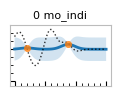

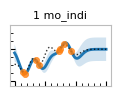

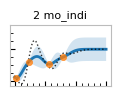

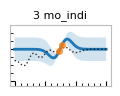

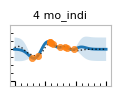

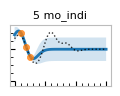

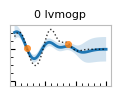

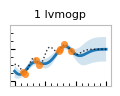

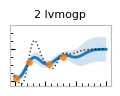

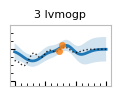

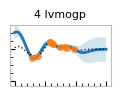

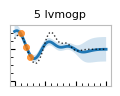

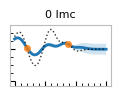

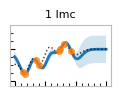

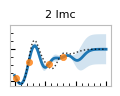

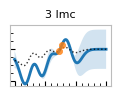

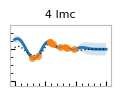

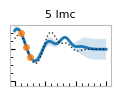

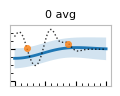

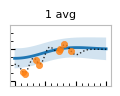

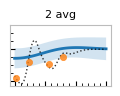

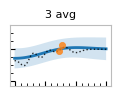

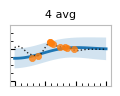

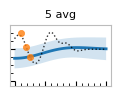

mo_indi
lvmogp
lmc
avg


/tmp/ipykernel_19985/3535923362.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(33*inch_conversion, 20*inch_conversion)); ax = plt.gca()


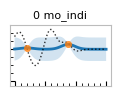

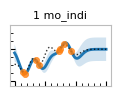

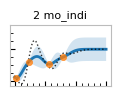

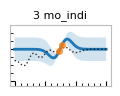

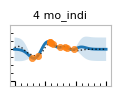

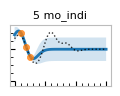

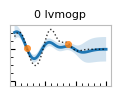

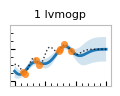

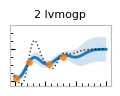

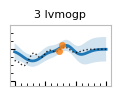

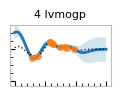

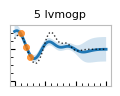

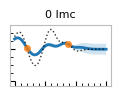

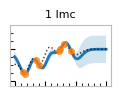

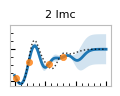

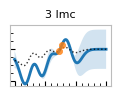

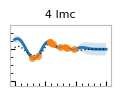

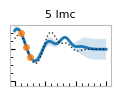

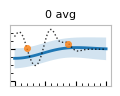

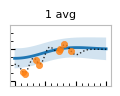

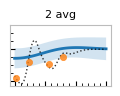

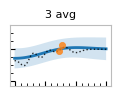

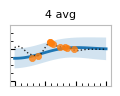

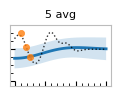

In [14]:

from utils.plotting_utils import get_gridpoints, unpack_series
import pathlib as pl
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
inch_conversion = 1/25.4

plot_new_ys = False

linewidth=2
markersize=20

row=0
for model_name, model in final_models_dict.items():
    print(model_name)


    x_new, fun_nos_new, x_new_lmc, x_new_lvmogp = get_gridpoints([0, 3], n_fun, {model_name: model}, observed_dims,
                                                                 n_points=100)
    if model_name == 'avg':
        pred_mu, pred_var = model.predict_y(x_new)
    elif model_name == 'lvmogp':
        pred_mu, pred_var = model.predict_y(x_new_lvmogp)
    else:
        pred_mu, pred_var = model.predict_y(x_new_lmc)

    for i, fun_no in enumerate(range(n_fun)):

        fig = plt.figure(figsize=(33*inch_conversion, 20*inch_conversion)); ax = plt.gca()

        f_news, _ = test_fun.functions[i].predict_f(x_new)

        if model_name == 'avg':
            idx = range(len(x_new))
        else:
            idx = range(len(x_new) * i, len(x_new) * (i + 1))
        ax.plot(x_new, pred_mu.numpy()[idx].flatten(), linewidth=linewidth)
        ax.fill_between(x_new.flatten(),
                            pred_mu.numpy()[idx].flatten() + np.sqrt(pred_var.numpy()[idx].flatten()),
                            pred_mu.numpy()[idx].flatten() - np.sqrt(pred_var.numpy()[idx].flatten()), alpha=0.2)

        ax.plot(x_new, f_news.numpy(), linestyle=':', color='k', linewidth=1, zorder=4, alpha=0.8)

        idx_train = np.where([fun_nos == fun_no])[1]
        ax.scatter(data_X[idx_train], data_y[idx_train], s=markersize, zorder=5, alpha=0.8)
        ax.set_ylim(np.min(data_y) - 0.5, np.max(data_y) + 0.5)

        ax.set_title(f'{fun_no} {model_name}')

        ax.xaxis.set_ticklabels([])
        ax.xaxis.set_major_locator(MultipleLocator(1))
        ax.yaxis.set_ticklabels([])

        # For the minor ticks, use no labels; default NullFormatter.
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        ax.grid(None)

        path = pl.Path().home()/'TLGP_plots'
        # plt.savefig(path / f'{model_name}_fun_{fun_no}_model_{model_name}.svg', bbox_inches='tight')
        # plt.savefig(path / f'{model_name}_{fun_no}_model_{model_name}.png', dpi=500, bbox_inches='tight')

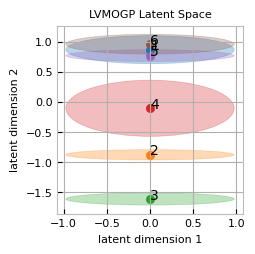

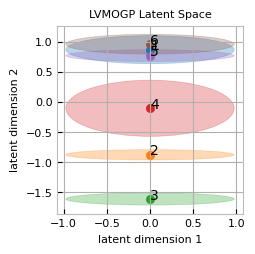

In [15]:
if 'lvmogp' in model_names:
    plot_lvmogp_latent_variables(final_models_dict['lvmogp'], save=False, path=None, file_name=None)
plt.show()
path = pl.Path().home()/'TLGP_plots'
# plt.savefig(path / f'lvmogp_latents.svg', bbox_inches='tight')
# plt.savefig(path / f'lvmogp_latents.png', dpi=500, bbox_inches='tight')

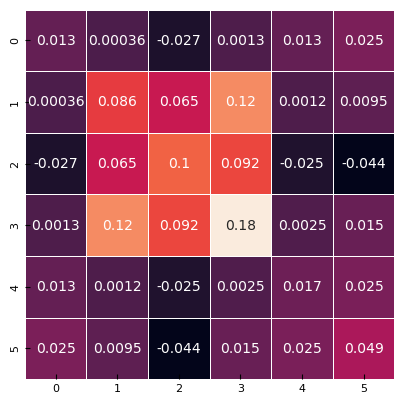

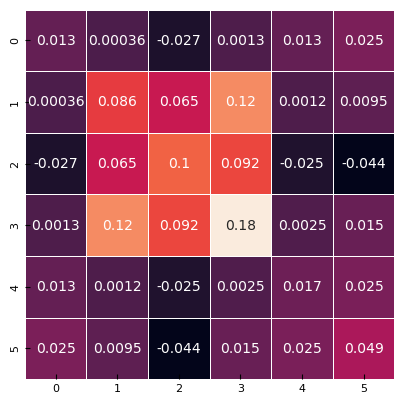

In [16]:

W = final_models_dict['lmc'].kernel.kernels[1].W.numpy()
kappa =  final_models_dict['lmc'].kernel.kernels[1].kappa.numpy()

B = np.matmul(W, W.T) + np.diag(kappa)

B  = B / np.sum(B)
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax =sns.heatmap(B, linewidth=0.5, annot=True, cbar=False)
ax.grid(False)
ax.set_aspect('equal')
plt.show()